#**Visualization using Histogram**
**Create a histogram or bar chart to visualize the distribution of data in a dataset.**

Importing necessary libraries



In [112]:
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew
%config InlineBackend.figure_format = 'retina'
# General fig dim and colors
fs = (20,10)
pal = 'CMRmap_r'

Path variable for dataset

In [113]:
df = pd.read_csv('/content/Iris.csv').drop('Id', axis=1)

Data Details

In [114]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [116]:
df.shape

(150, 5)

Observing null values and Data types

In [117]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Observing counts of Predicted variable

In [118]:
display( pd.DataFrame(df.Species.value_counts()) )

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


Description of Predictors

In [119]:
df.describe().T.iloc[0:, 1:].style.background_gradient(cmap=pal)

,mean,std,min,25%,50%,75%,max
SepalLengthCm,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
PetalWidthCm,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000


Correlation Matrix

In [120]:
# Remove the 'Species' column from the DataFrame
data_numeric = df.drop('Species', axis=1)

In [131]:
# Calculate the correlation matrix
corr_matrix = data_numeric.corr()

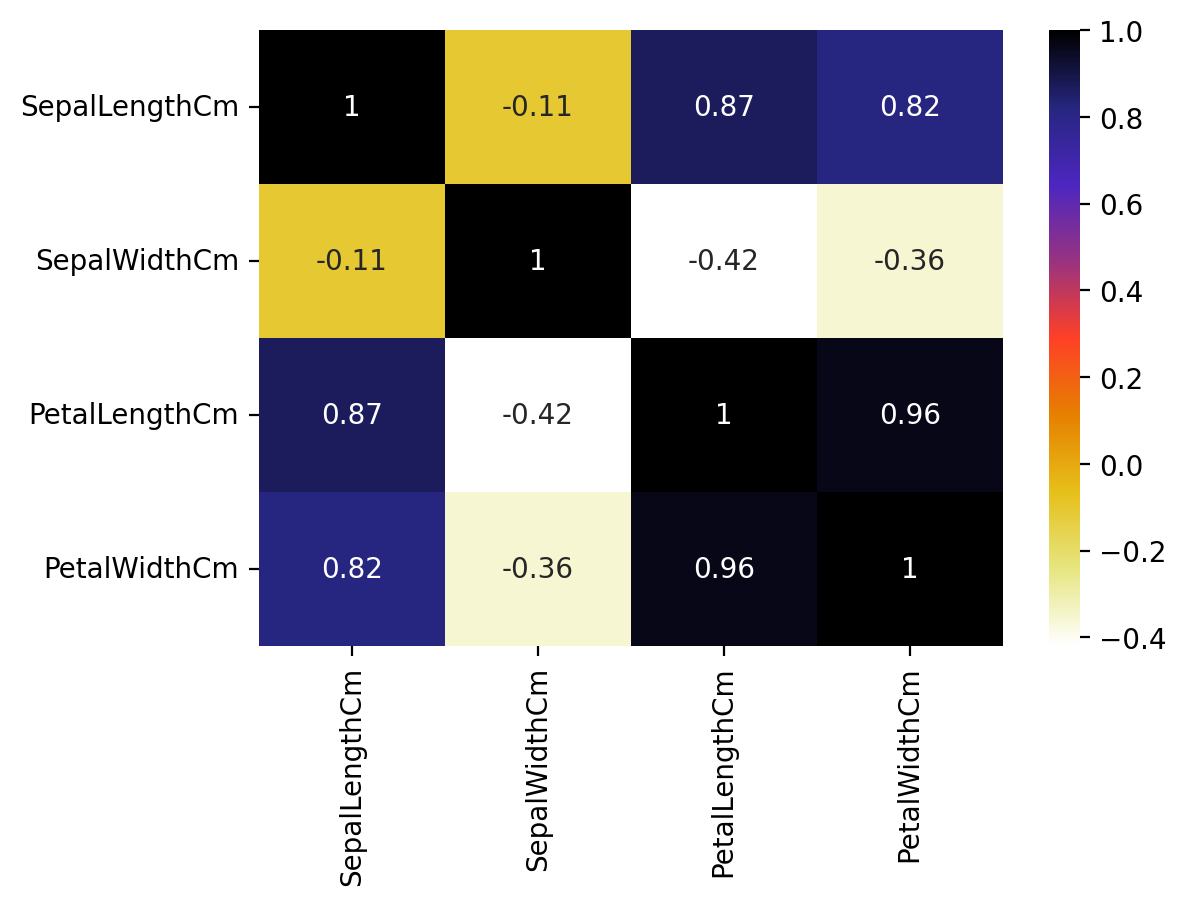

In [132]:
# Plot the heatmap
pl.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap=pal)
pl.show()

Data Visualization

Scatter and Kernal Density Matrix

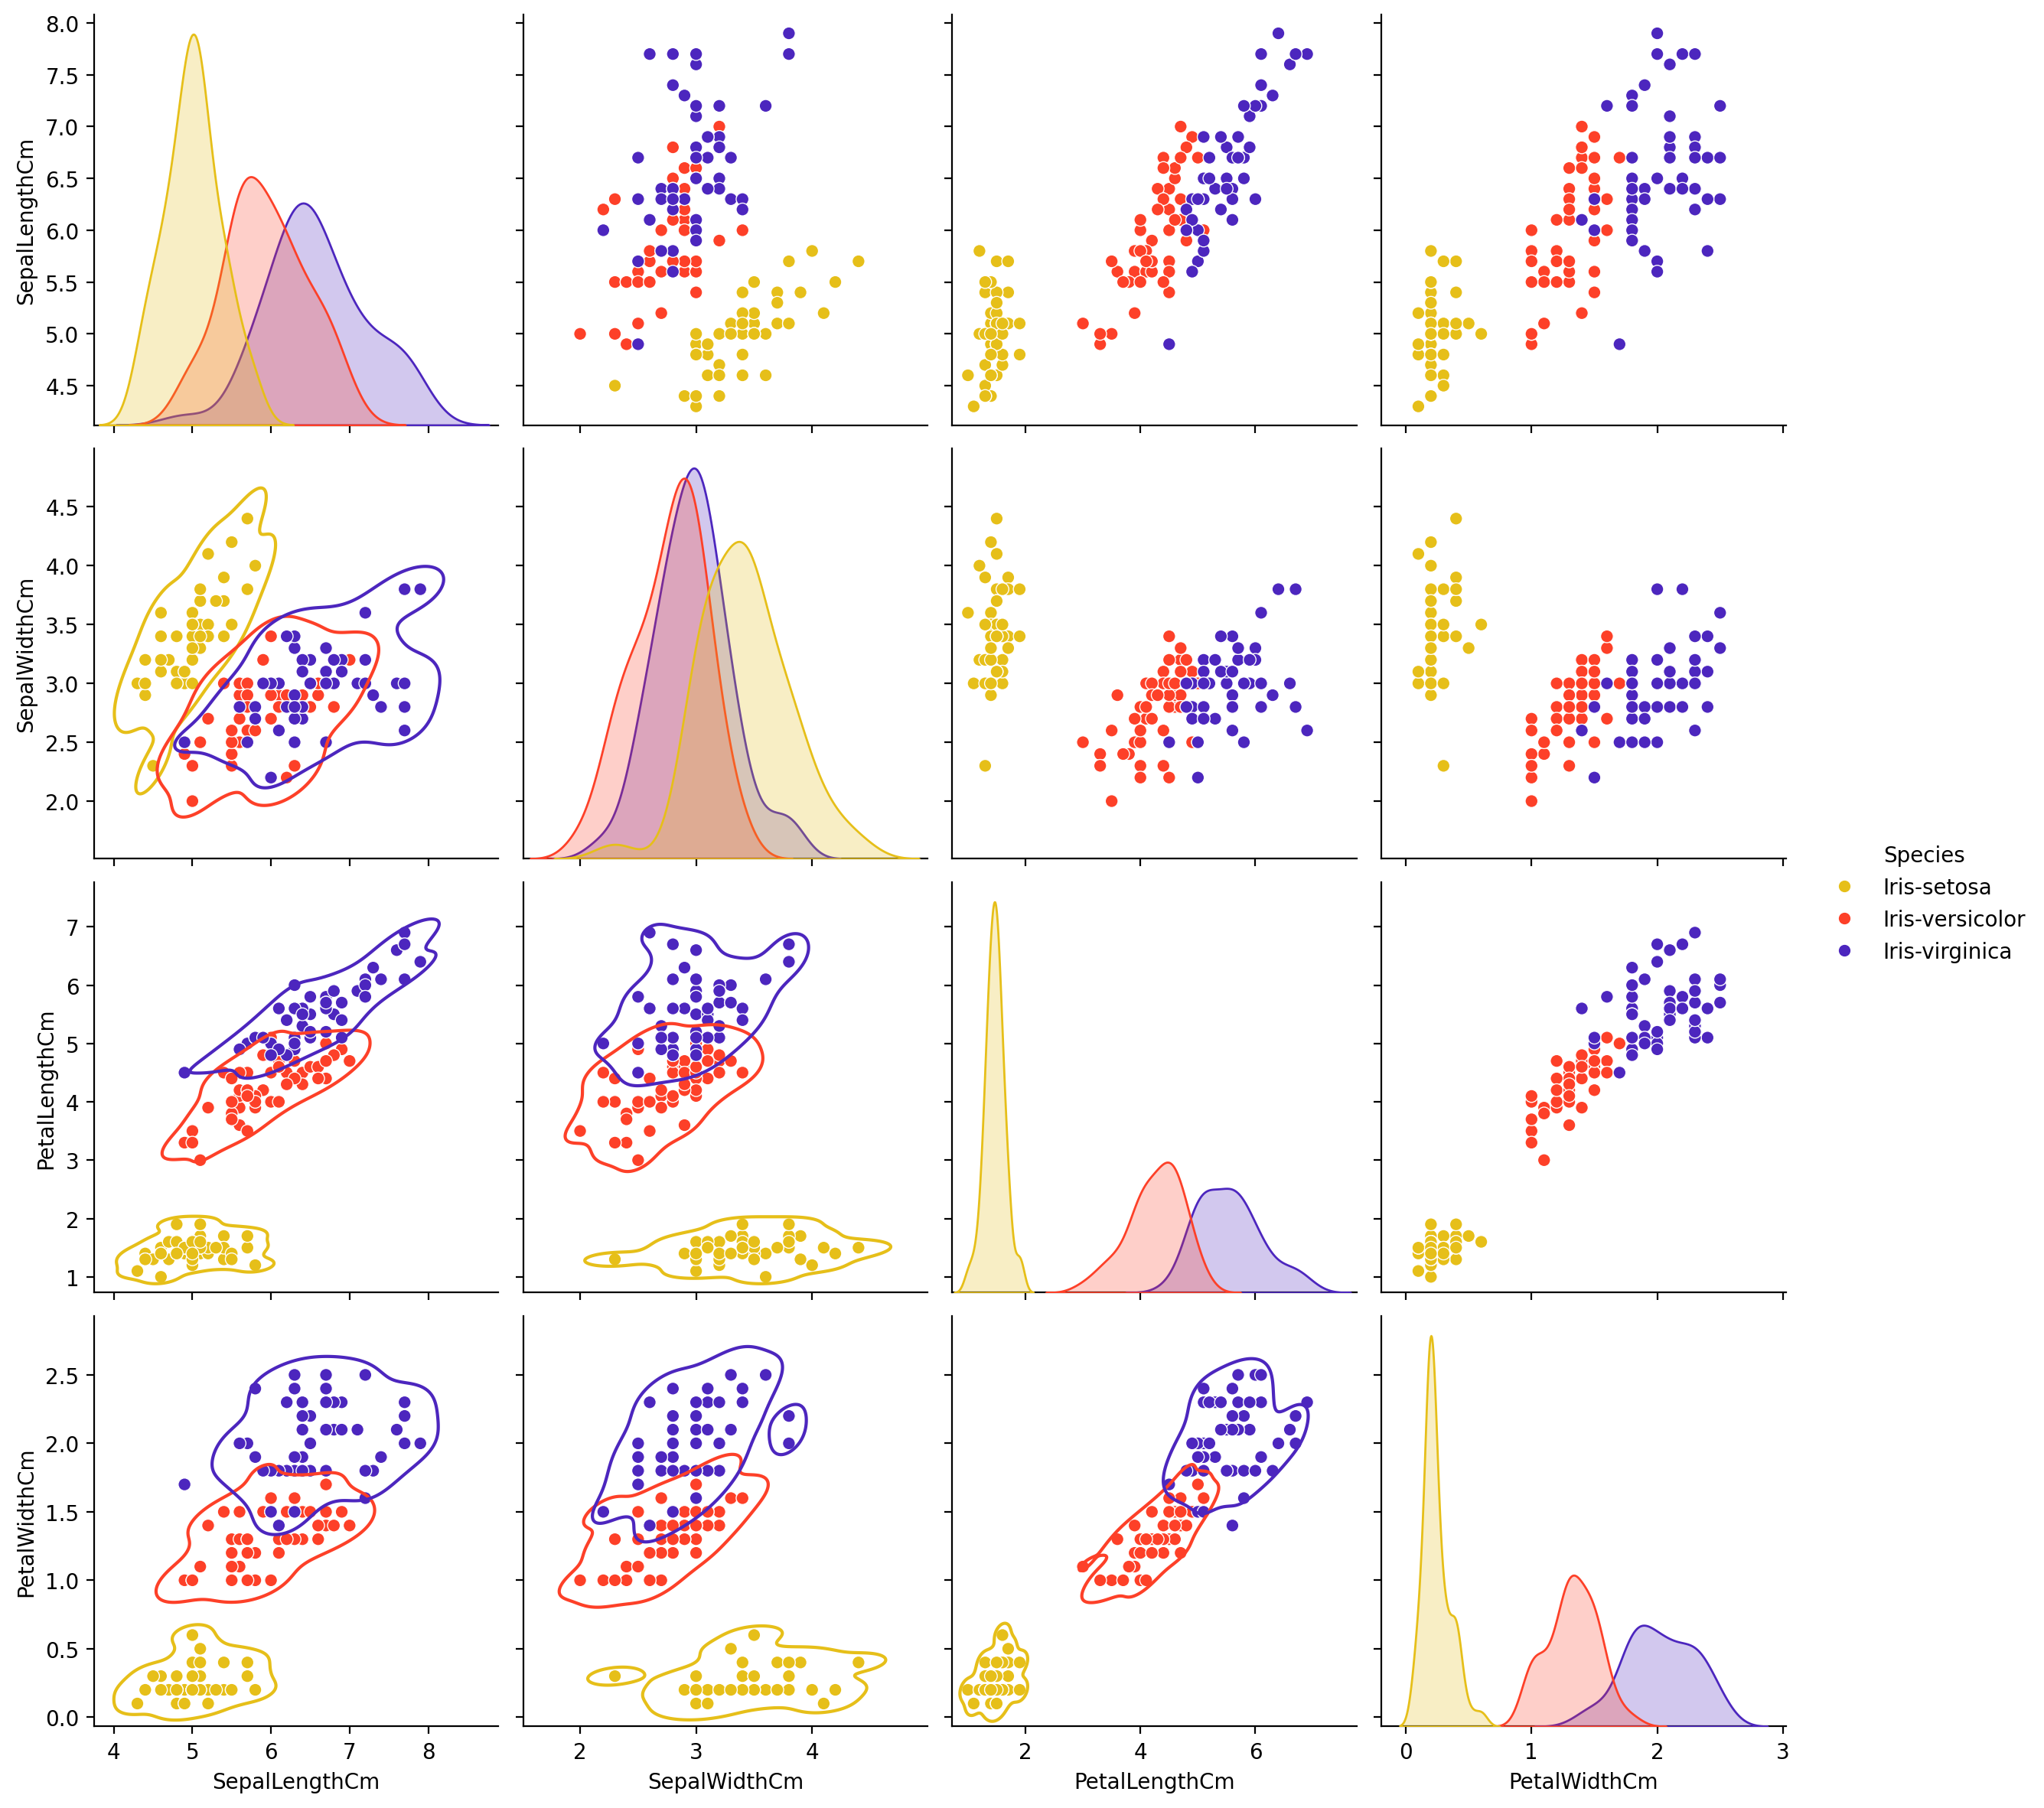

In [122]:
sns.pairplot(df, hue='Species', palette=pal, height=3).map_lower(sns.kdeplot, levels=2)
pl.show()

Joint Plot

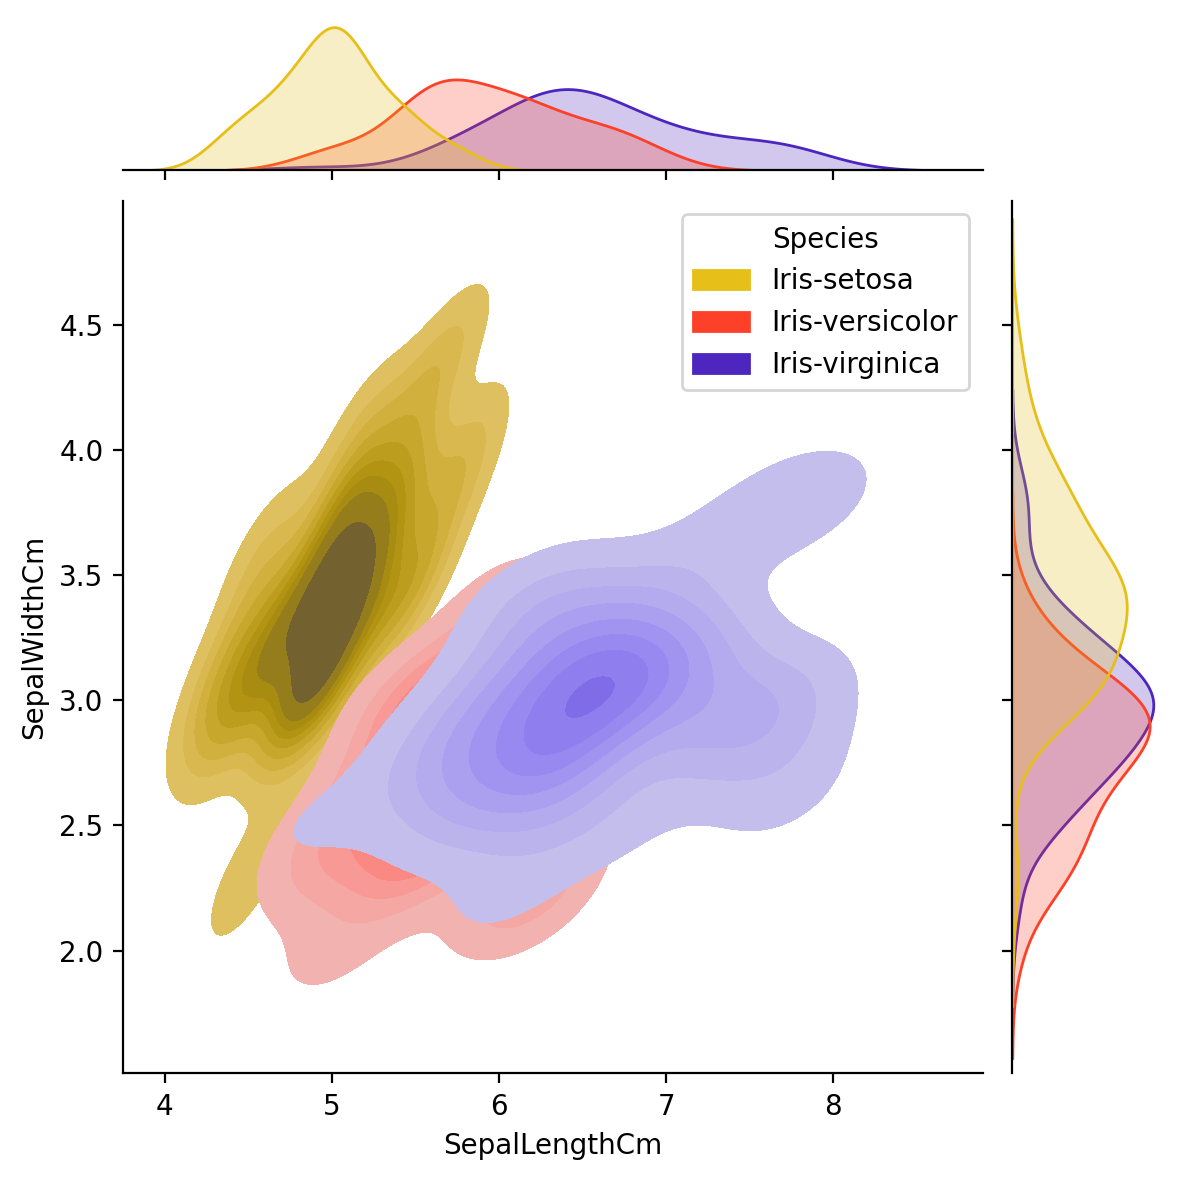

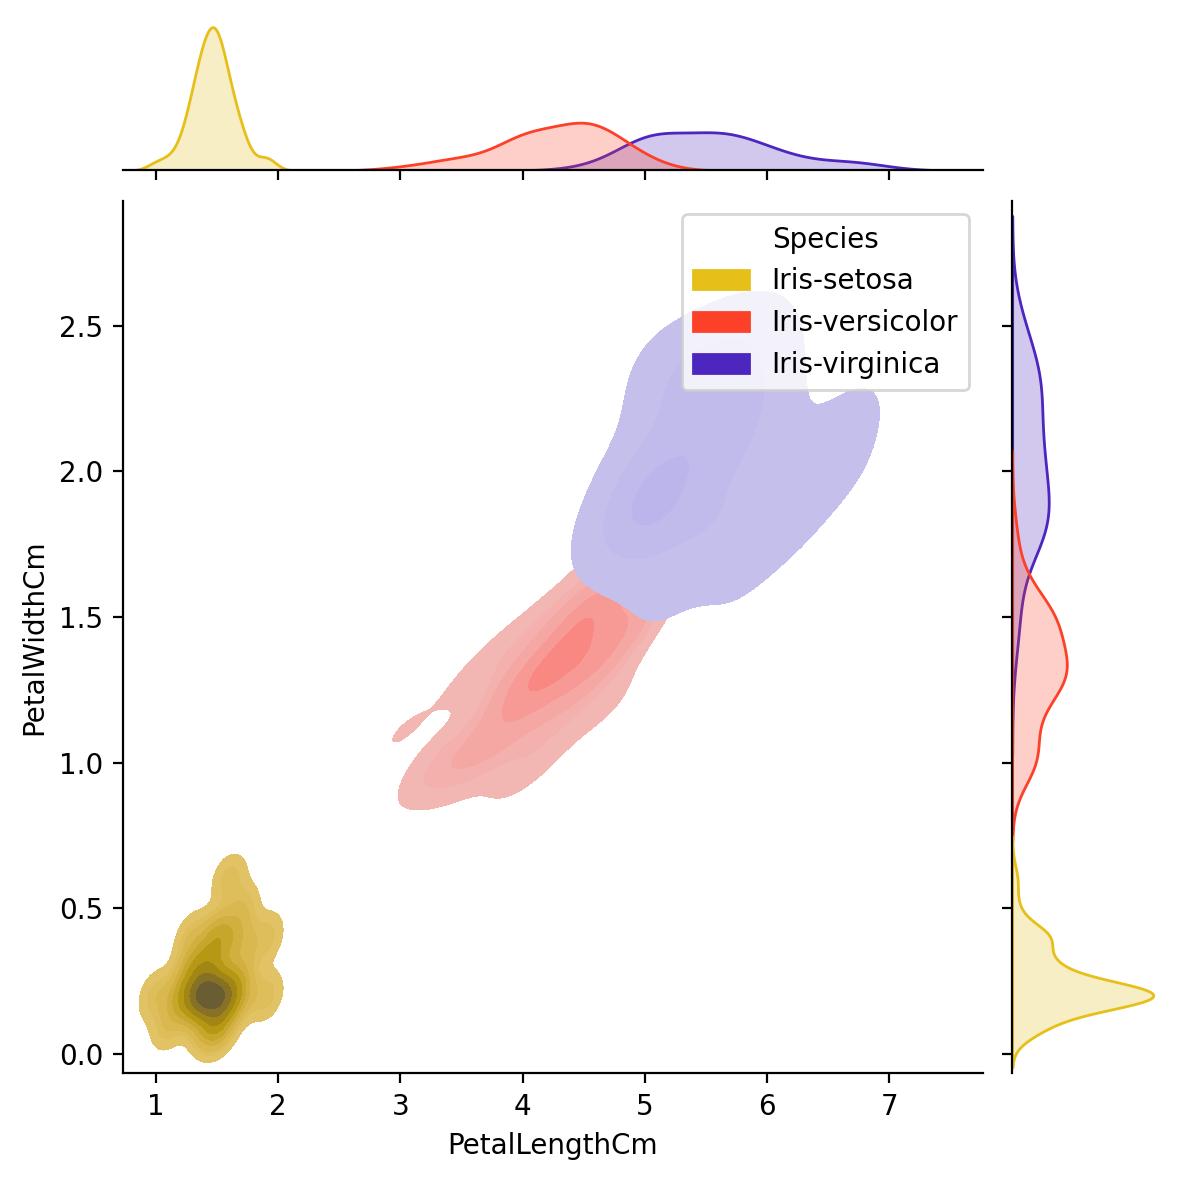

In [123]:
sns.jointplot(x='SepalLengthCm',
              y='SepalWidthCm',
              kind="kde",
              fill=True,
              palette=pal,
              hue='Species',
              data=df)

sns.jointplot(x='PetalLengthCm',
              y='PetalWidthCm',
              kind="kde",
              fill=True,
              palette=pal,
              hue='Species',
              data=df)

pl.show()

Violin and Strip Plots

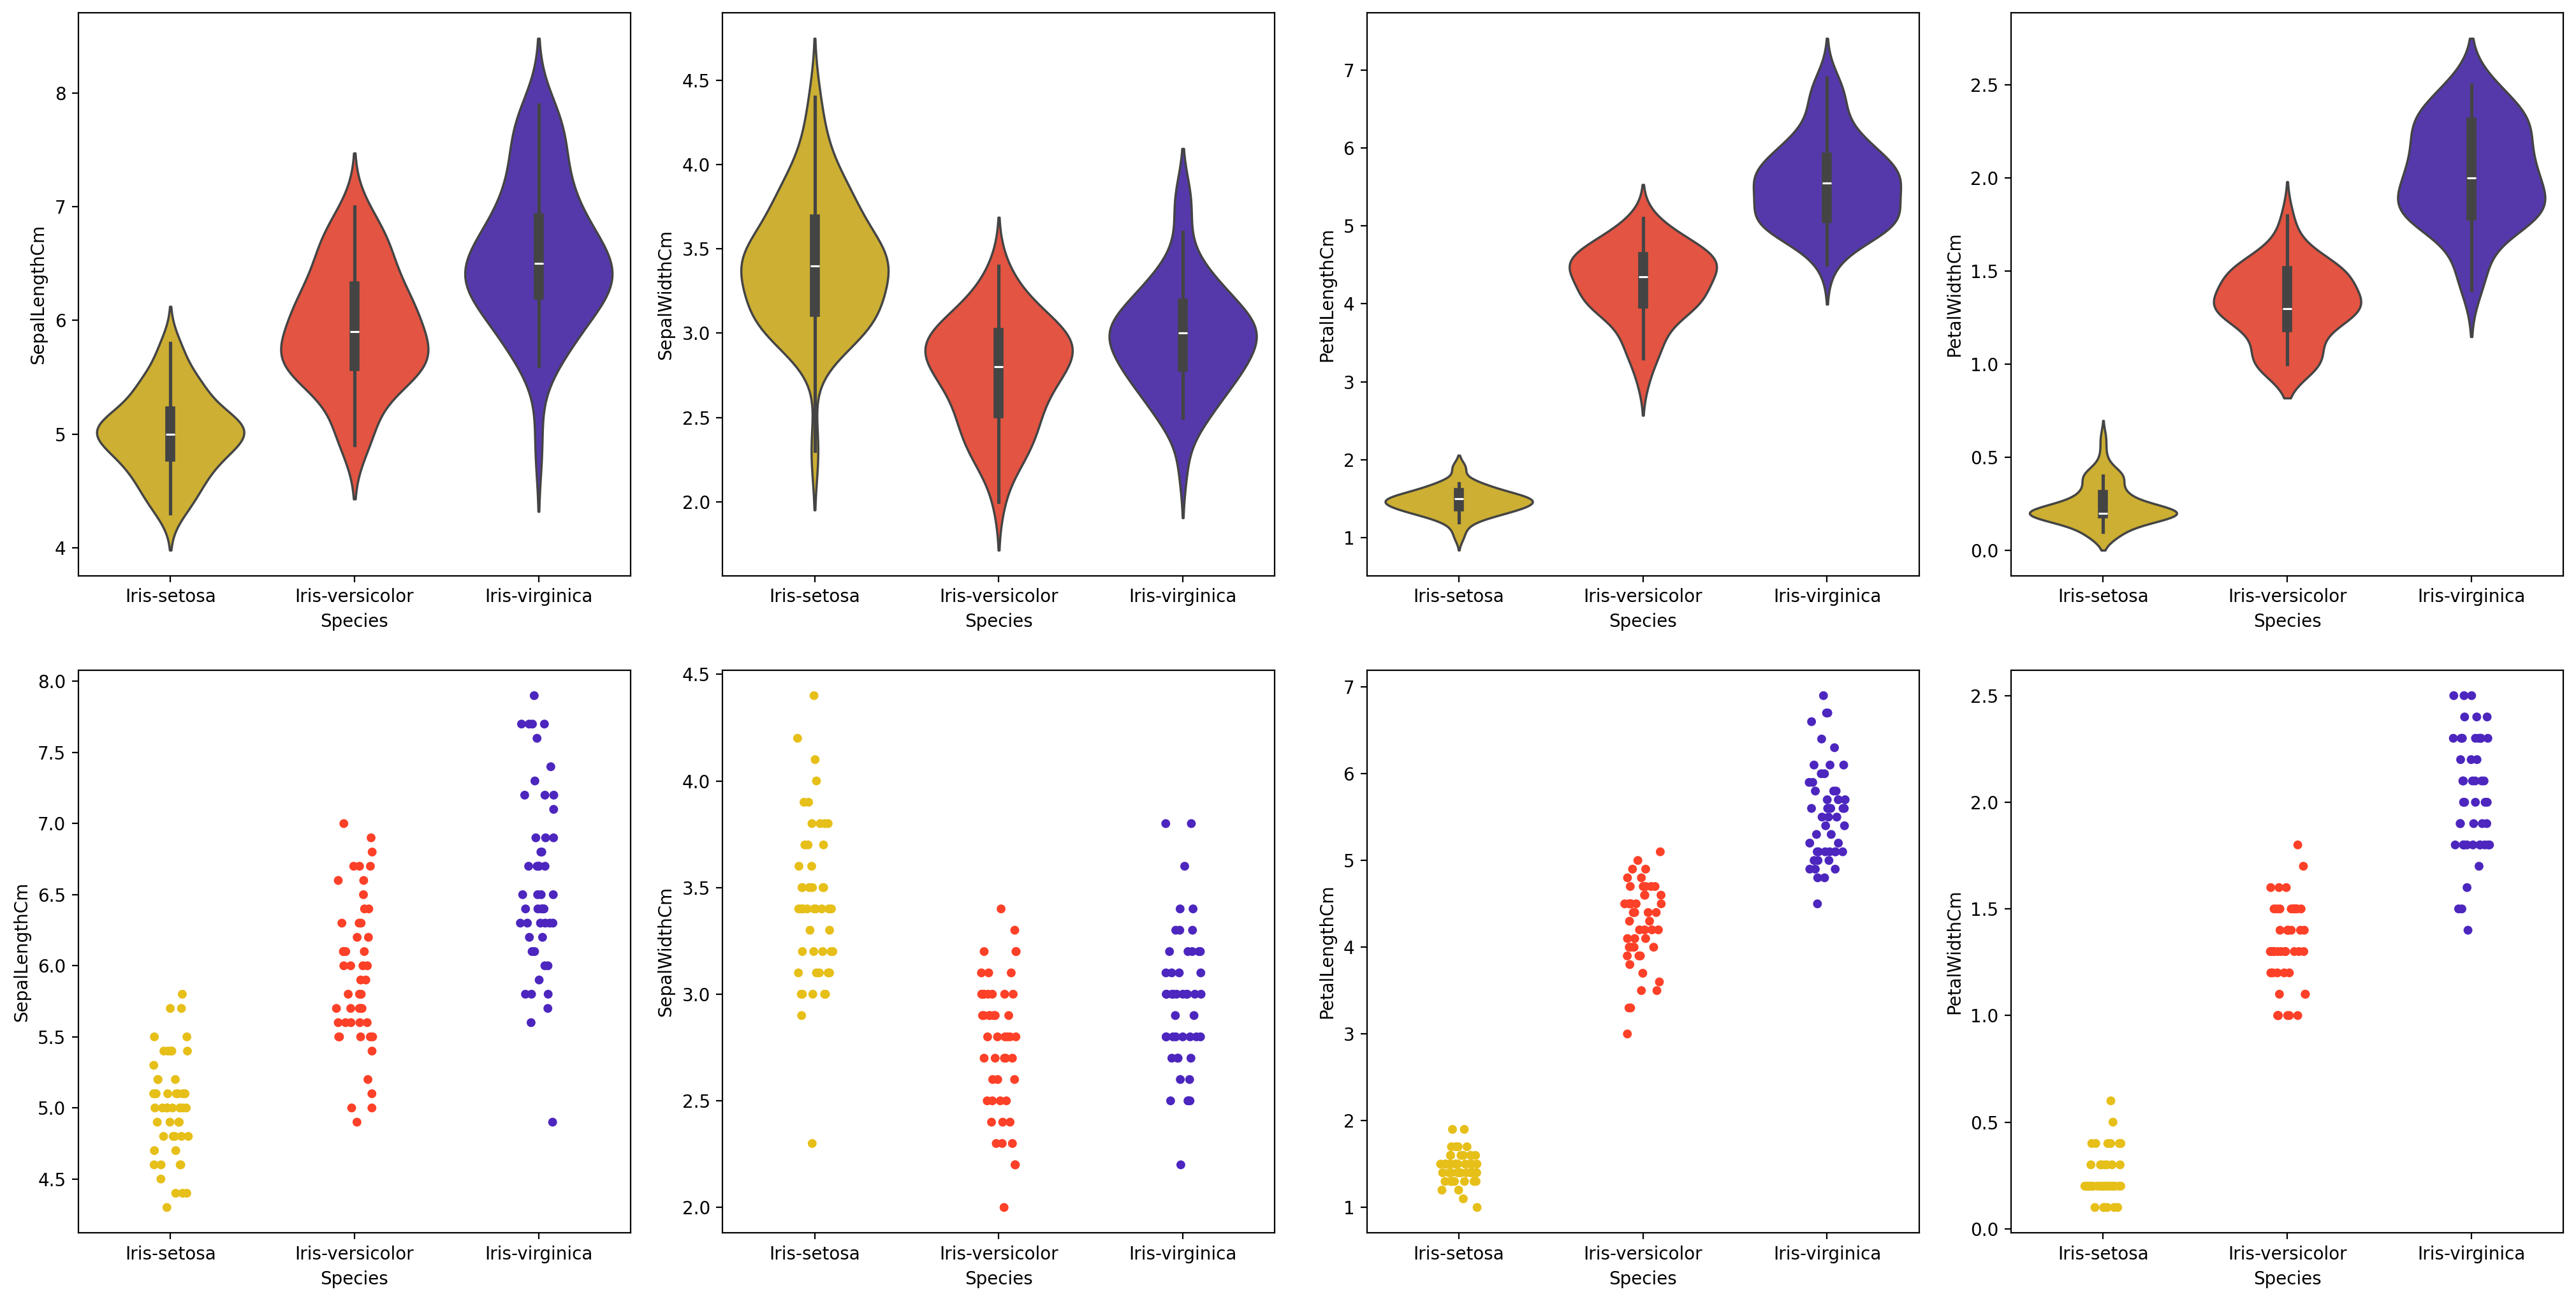

In [124]:
fig, axes = pl.subplots(2, 4, figsize=fs)

# Violin Plots
for ax, col in zip(axes.flatten(), df.columns[:-1]):
    sns.violinplot(x='Species', y=col, palette=pal, data=df, ax=ax)

# Strip Plots
for ax, col in zip(axes.flatten()[4:], df.columns[:-1]):
    sns.stripplot(x='Species', y=col, palette=pal, data=df, ax=ax)

pl.tight_layout(pad=0, w_pad=1.5, h_pad=2)
pl.show()


Histograms

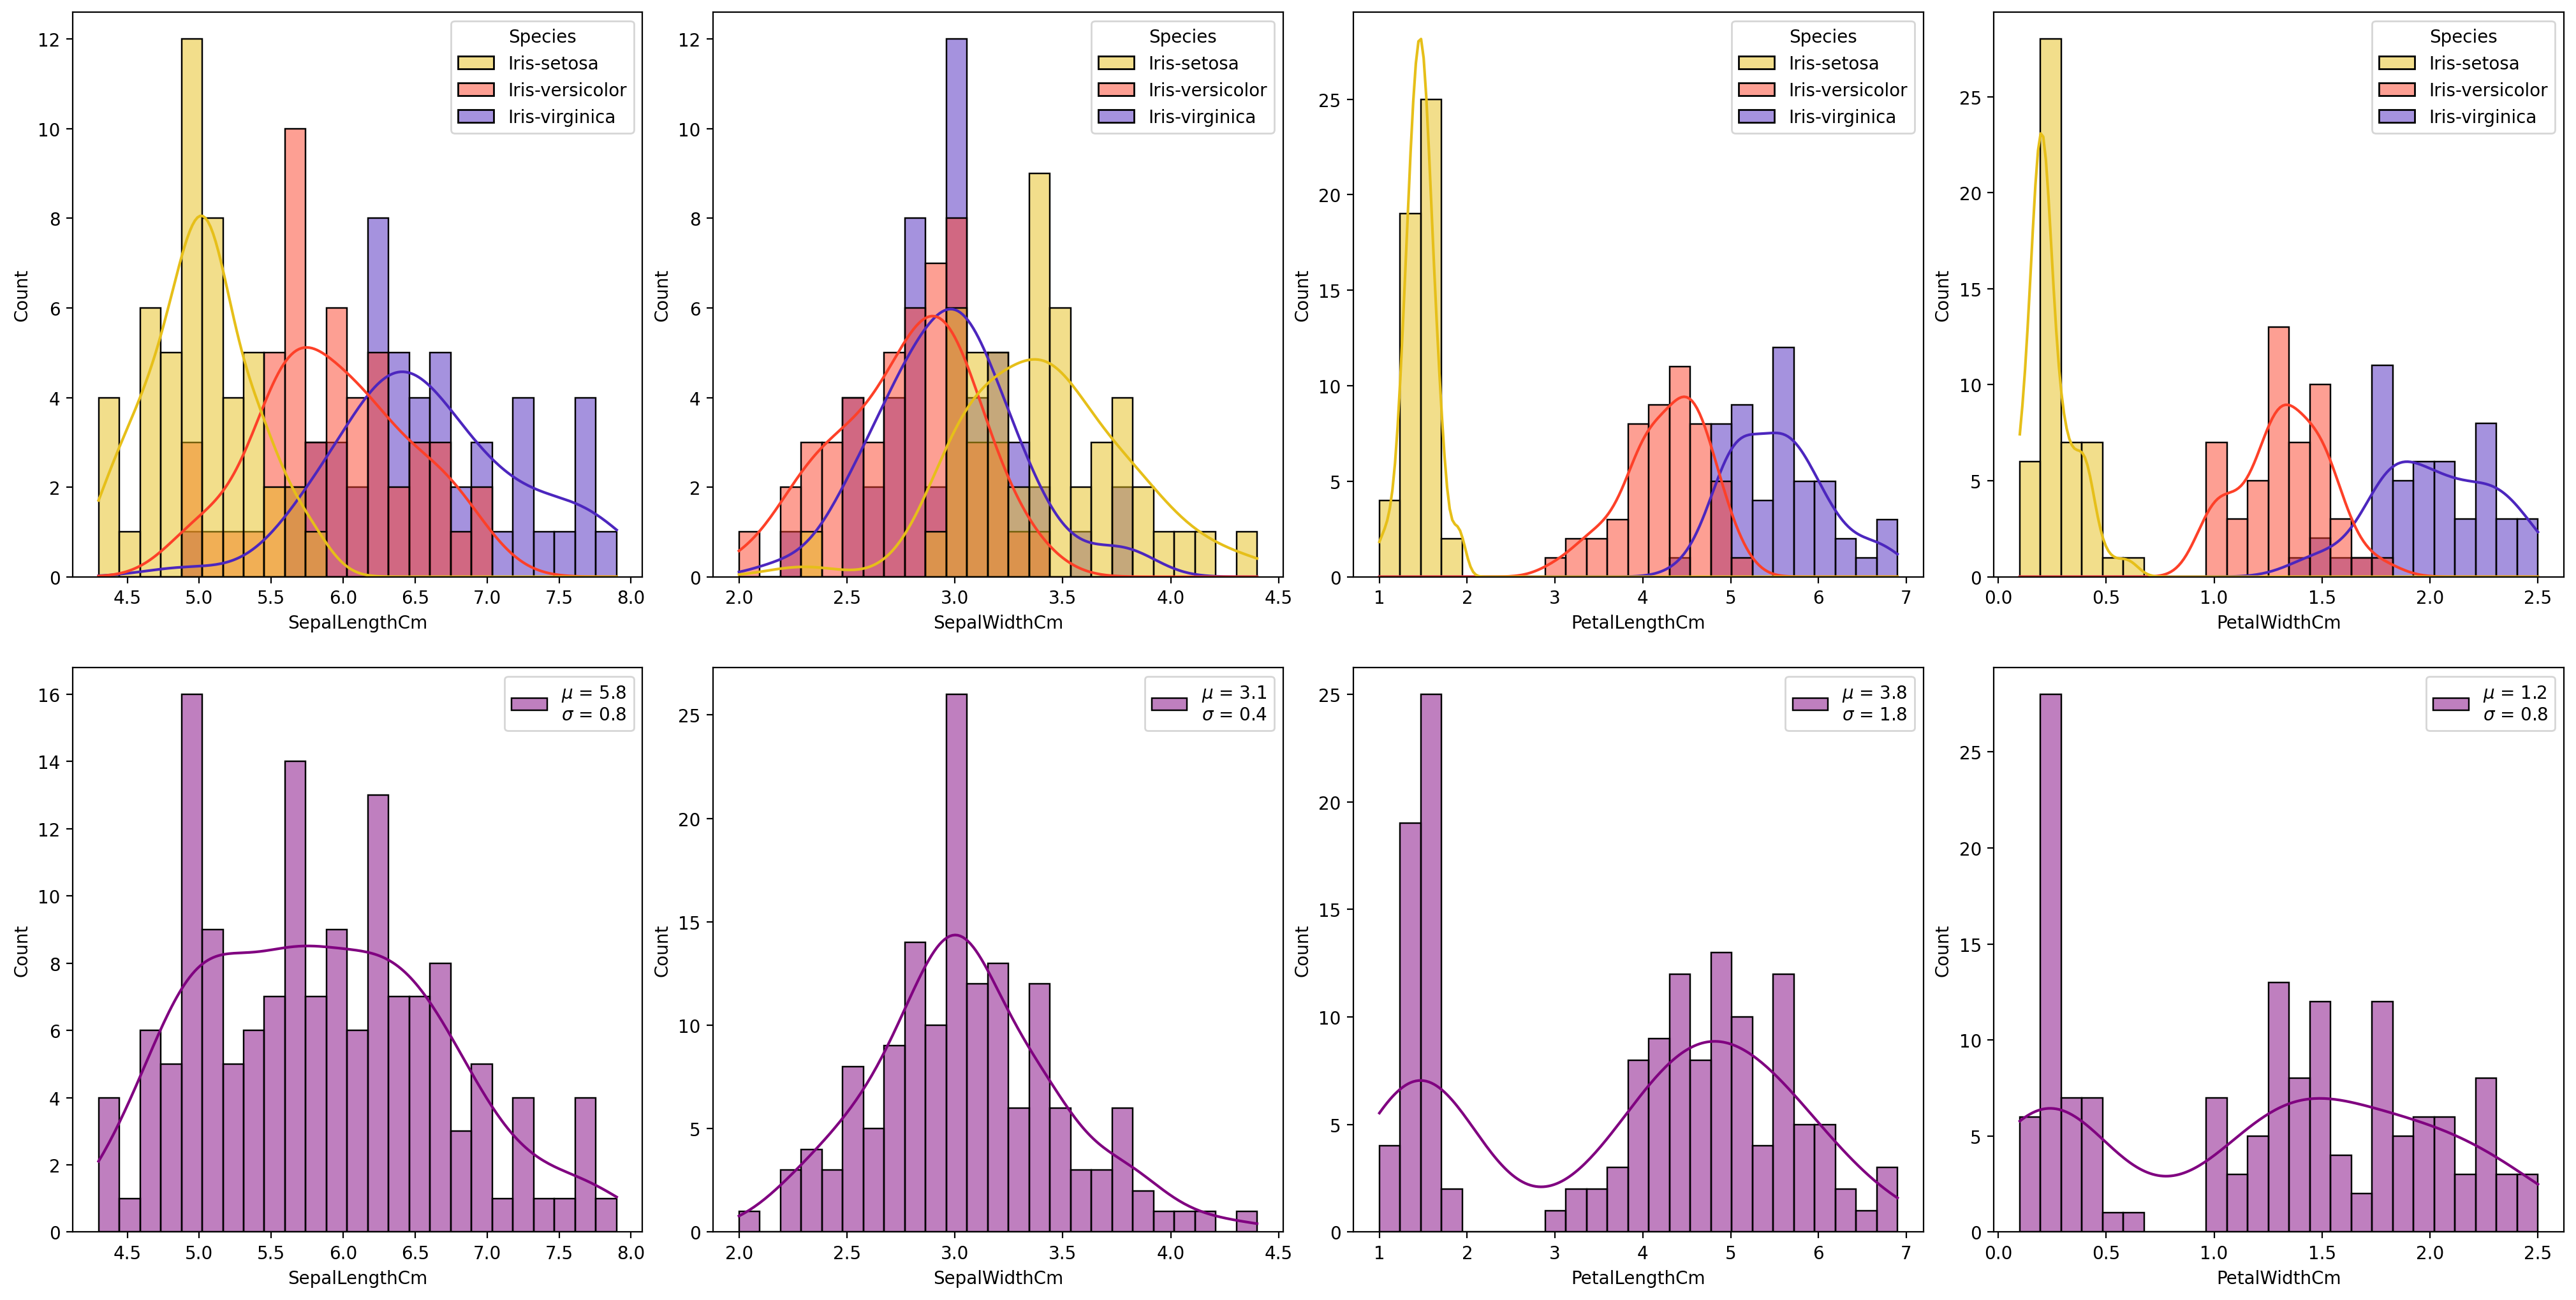

In [125]:
fig, axes = pl.subplots(2, 4, figsize=fs)

# Categorized Histograms
for ax, col in zip(axes.flatten(), df.columns[:-1]):
    sns.histplot(data=df, x=col, kde=True, bins=25, hue='Species', palette=pal, ax=ax)

# Total Histograms
for ax, col in zip(axes.flatten()[4:], df.columns[:-1]):
    mu, sigma = norm.fit(df[col])
    sns.histplot(data=df, x=col, kde=True, bins=25, color='purple', ax=ax,
                 label=f'$\mu$ = {mu:.1f}\n$\sigma$ = {sigma:.1f}')
    ax.legend()

pl.tight_layout(pad=0, w_pad=0, h_pad=2)
pl.show()

In [126]:
from plotly.express import scatter_matrix
from plotly.express import parallel_categories
from plotly.express import scatter_3d

 Interactive Scatter Matrix

In [127]:
scatter_matrix(df, dimensions=df.columns[:-1], color='Species',
               color_discrete_sequence=['yellow', 'red', 'purple'])

Interactive Parallel Catergory

In [128]:
parallel_categories(df)

3D Scatter Plot

In [129]:
scatter_3d(x='PetalLengthCm',
           y='PetalWidthCm',
           z='SepalLengthCm',
           color='Species',
           color_discrete_sequence=['yellow', 'red', 'purple'],
           data_frame=df).show()

In [130]:
scatter_3d(x='PetalLengthCm',
           y='PetalWidthCm',
           z='SepalWidthCm',
           color='Species',
           color_discrete_sequence=['yellow', 'red', 'purple'],
           data_frame=df).show()